In [1]:
from pathlib import Path

import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

import pyarrow as pa
import pyarrow.parquet as pq

## Parameters

In [2]:
NOTEBOOK_NAME = "data-challenge"
NOTEBOOK_PATH = Path(NOTEBOOK_NAME).resolve()
NOTEBOOK_PATH.mkdir(exist_ok=True)
NOTEBOOK_PATH

WindowsPath('C:/Users/dasha/Documents/coding/octagon-data-science-competition/notebooks/data-challenge')

In [3]:
screen = pd.read_excel('../input/asthma-study-2019.xlsx',
                      sheet_name='Screen')
screen.head()

,id,date,clinic,infconsent,18+,eos300,eos150,sputum,acq-screen,result
0,2311,2017-02-11,23,y,y,0.0,NaN,NaN,3.666667,n
1,2800,2017-02-11,28,y,y,1.0,NaN,NaN,3.000000,NaN
2,1110,2017-02-12,11,y,y,0.0,NaN,NaN,3.833333,n
3,302,2017-02-16,3,y,y,0.0,NaN,NaN,3.166667,n
4,1102,2017-02-16,11,y,y,1.0,NaN,NaN,3.666667,NaN


In [4]:
demo1 = pd.read_excel('../input/asthma-study-2019.xlsx',
                      sheet_name='Demographics')
demo1.head()

,id,age,race,ethnicity,gender,work,retire,disab
0,102,25,Canadian,White,0,1,NaN,0
1,105,97,Canadian,NaN,0,0,0.0,0
2,118,50,Canadian,NaN,0,0,0.0,1
3,119,22,Canadian,arab,0,1,NaN,0
4,120,52,Canadian,NaN,0,0,1.0,1


In [5]:
demo2 = pd.read_excel('../input/asthma-study-2019.xlsx',
                      sheet_name='Demographics(1)')
demo2.head() 

,id,assess,birthyear,race,sex,work,retire,disab
0,1113,2017-02-11,1976,filipino,0,0,1.0,0
1,2902,2017-02-11,1964,chinese,0,0,1.0,0
2,1908,2017-02-12,1954,south east asian,0,1,NaN,0
3,3002,2017-02-16,1976,south asian,1,0,1.0,1
4,3006,2017-02-16,1982,south asian,0,1,NaN,1


In [6]:
print(demo1.shape, demo2.shape)
demo = pd.concat([demo1, demo2], sort=False)
demo

(57, 8) (344, 8)


,id,age,race,ethnicity,gender,work,retire,disab,assess,birthyear,sex
0,102,25.0,Canadian,White,0.0,1,NaN,0,NaT,NaN,NaN
1,105,97.0,Canadian,NaN,0.0,0,0.0,0,NaT,NaN,NaN
2,118,50.0,Canadian,NaN,0.0,0,0.0,1,NaT,NaN,NaN
3,119,22.0,Canadian,arab,0.0,1,NaN,0,NaT,NaN,NaN
4,120,52.0,Canadian,NaN,0.0,0,1.0,1,NaT,NaN,NaN
5,124,34.0,Canadian,Syria/Serbia,0.0,0,1.0,0,NaT,NaN,NaN
6,1100,52.0,white,NaN,0.0,0,0.0,0,NaT,NaN,NaN
7,900,65.0,black,NaN,0.0,0,0.0,1,NaT,NaN,NaN
8,2900,77.0,asian,NaN,0.0,1,NaN,0,NaT,NaN,NaN
9,2500,51.0,asian,hawaii,0.0,1,NaN,0,NaT,NaN,NaN


In [7]:
hist1 = pd.read_excel('../input/asthma-study-2019.xlsx',
                      sheet_name='medhistory')
hist1.head()

,id,co-copd,co-heartfailure,co-diabetes,co-yellowfever,co-asthma,co-pulmonaryembolism,co-bronchitis,co-arthritis,co-pneumonia
0,100,NaN,0.511612,0.797143,NaN,0.789300,NaN,NaN,NaN,0.860042
1,101,NaN,NaN,0.730094,NaN,0.891995,NaN,NaN,NaN,0.442976
2,102,NaN,NaN,0.099612,NaN,1.000000,NaN,1.0,NaN,0.882046
3,103,0.0,NaN,0.013703,NaN,NaN,NaN,NaN,1.0,0.956755
4,104,NaN,NaN,0.825495,NaN,1.000000,NaN,NaN,NaN,0.712851


In [8]:
hist1.rename(
    columns={"co-arthritis": "arthritis", 
             "co-bronchitis": "bronchitis",
            "co-pneumonia": "pneumonia",
            "co-diabetes": "diabetes",
            "co-heartfailure": "hearfailure",
            "co-pulmonaryembolism":"pulmonaryembolism",
            "co-copd": "copd",
            "co-asthma": "asthma"}, inplace=True)

In [9]:
# hist1.head()
# hist1.drop(["co-yellowfever"], axis=1, inplace=True)
hist1.head()

,id,copd,hearfailure,diabetes,co-yellowfever,asthma,pulmonaryembolism,bronchitis,arthritis,pneumonia
0,100,NaN,0.511612,0.797143,NaN,0.789300,NaN,NaN,NaN,0.860042
1,101,NaN,NaN,0.730094,NaN,0.891995,NaN,NaN,NaN,0.442976
2,102,NaN,NaN,0.099612,NaN,1.000000,NaN,1.0,NaN,0.882046
3,103,0.0,NaN,0.013703,NaN,NaN,NaN,NaN,1.0,0.956755
4,104,NaN,NaN,0.825495,NaN,1.000000,NaN,NaN,NaN,0.712851


In [10]:
hist2 = pd.read_excel('../input/asthma-study-2019.xlsx',
                      sheet_name='medhistory(1)')
hist2.head()

,id,assess,smoking,polyps,vaccine,arthritis,CVD,Prev-biologic,allergy,weight,height
0,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,135,43689.0,0.000000,0.4,0.08,0.31,0.07,0.8,0.2,112.0,55.0
2,136,43010.0,0.337016,0.2,0.17,0.34,0.45,1.0,0.9,152.0,50.0
3,137,43124.0,0.509537,0.3,0.48,0.15,0.19,1.0,0.1,289.0,77.0
4,138,43404.0,0.000000,0.5,0.31,0.17,0.04,1.0,0.4,132.0,74.0


In [11]:
hist2.rename(columns={"id ": "id"}, inplace=True)
hist1.rename(columns={"id ": "id"}, inplace=True)

In [12]:
hist=pd.concat([hist1, hist2], sort=False)

In [13]:
print(hist1.shape, hist2.shape, hist.shape, len(hist['id'].unique()))

(57, 10) (344, 11) (401, 19) 401


In [14]:
hist.head()

,id,copd,hearfailure,diabetes,co-yellowfever,asthma,pulmonaryembolism,bronchitis,arthritis,pneumonia,assess,smoking,polyps,vaccine,CVD,Prev-biologic,allergy,weight,height
0,100,NaN,0.511612,0.797143,NaN,0.789300,NaN,NaN,NaN,0.860042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,NaN,NaN,0.730094,NaN,0.891995,NaN,NaN,NaN,0.442976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,102,NaN,NaN,0.099612,NaN,1.000000,NaN,1.0,NaN,0.882046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103,0.0,NaN,0.013703,NaN,NaN,NaN,NaN,1.0,0.956755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,NaN,NaN,0.825495,NaN,1.000000,NaN,NaN,NaN,0.712851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
acq = pd.read_excel('../input/asthma-study-2019.xlsx',
                      sheet_name='ACQ')
acq.head()

,id,date,acq,date2,acq2,date3,acq3,date4,acq4,date5,acq5
0,122,1900-01-01,3.666667,1900-01-02,2.200000,1900-01-03,2.420000,1900-01-04,2.420,1900-01-05,2.1780
1,129,1900-01-01,1.833333,1900-01-02,0.366667,1900-01-03,0.403333,2018-11-28,0.484,2019-02-07,0.4356
2,120,1900-01-01,3.500000,1900-01-02,3.850000,1900-02-02,4.235000,1900-01-04,5.082,2018-08-26,3.5574
3,127,1900-01-01,6.000000,1900-01-22,1.800000,1900-01-03,1.980000,2018-07-16,1.584,2018-09-14,1.2672
4,123,1900-01-01,1.500000,1900-01-02,0.600000,1900-01-03,0.600000,1900-01-04,0.480,1900-01-05,0.5280


In [16]:
from pandas import datetime as dt


In [17]:
acq['time1'] = 0
acq['time2'] = ((acq["date2"] - acq['date'])/np.timedelta64(1, 'D')).astype(int)
acq['time3'] = ((acq["date3"] - acq['date'])/np.timedelta64(1, 'D')).astype(int)
acq['time4'] = ((acq["date4"] - acq['date'])/np.timedelta64(1, 'D')).astype(int)
acq['time5'] = ((acq["date5"] - acq['date'])/np.timedelta64(1, 'D')).astype(int)

In [18]:
acq

,id,date,acq,date2,acq2,date3,acq3,date4,acq4,date5,acq5,time1,time2,time3,time4,time5
0,122,1900-01-01,3.666667,1900-01-02,2.200000,1900-01-03,2.420000,1900-01-04,2.420000,1900-01-05,2.178000,0,1,2,3,4
1,129,1900-01-01,1.833333,1900-01-02,0.366667,1900-01-03,0.403333,2018-11-28,0.484000,2019-02-07,0.435600,0,1,2,43430,43501
2,120,1900-01-01,3.500000,1900-01-02,3.850000,1900-02-02,4.235000,1900-01-04,5.082000,2018-08-26,3.557400,0,1,32,3,43336
3,127,1900-01-01,6.000000,1900-01-22,1.800000,1900-01-03,1.980000,2018-07-16,1.584000,2018-09-14,1.267200,0,21,2,43295,43355
4,123,1900-01-01,1.500000,1900-01-02,0.600000,1900-01-03,0.600000,1900-01-04,0.480000,1900-01-05,0.528000,0,1,2,3,4
5,119,1900-01-01,1.666667,1900-01-02,0.666667,1900-01-03,0.666667,1900-01-04,0.800000,1900-01-05,0.720000,0,1,2,3,4
6,111,1900-01-01,5.000000,1900-01-02,0.000000,1900-01-03,0.000000,2019-05-16,0.000000,2019-07-14,0.000000,0,1,2,43599,43658
7,101,1900-01-01,1.500000,1900-01-02,0.450000,1900-01-03,0.405000,1900-01-04,0.486000,2019-01-25,0.388800,0,1,2,3,43488
8,118,1900-01-01,3.333333,1900-01-02,4.333333,1900-01-03,4.766667,1900-01-04,3.813333,1900-01-05,2.669333,0,1,2,3,4
9,117,1900-01-01,2.333333,1900-01-02,0.233333,1900-01-03,0.233333,1900-01-04,0.186667,1900-01-05,0.205333,0,1,2,3,4


In [19]:
acq.loc[acq["time2"] > 1000, ["time2"]] = None
acq.loc[acq["time3"] > 1000, ["time3"]] = None
acq.loc[acq["time4"] > 1000, ["time4"]] = None
acq.loc[acq["time5"] > 1000, ["time5"]] = None

In [20]:
acq

,id,date,acq,date2,acq2,date3,acq3,date4,acq4,date5,acq5,time1,time2,time3,time4,time5
0,122,1900-01-01,3.666667,1900-01-02,2.200000,1900-01-03,2.420000,1900-01-04,2.420000,1900-01-05,2.178000,0,1.0,2.0,3.0,4.0
1,129,1900-01-01,1.833333,1900-01-02,0.366667,1900-01-03,0.403333,2018-11-28,0.484000,2019-02-07,0.435600,0,1.0,2.0,NaN,NaN
2,120,1900-01-01,3.500000,1900-01-02,3.850000,1900-02-02,4.235000,1900-01-04,5.082000,2018-08-26,3.557400,0,1.0,32.0,3.0,NaN
3,127,1900-01-01,6.000000,1900-01-22,1.800000,1900-01-03,1.980000,2018-07-16,1.584000,2018-09-14,1.267200,0,21.0,2.0,NaN,NaN
4,123,1900-01-01,1.500000,1900-01-02,0.600000,1900-01-03,0.600000,1900-01-04,0.480000,1900-01-05,0.528000,0,1.0,2.0,3.0,4.0
5,119,1900-01-01,1.666667,1900-01-02,0.666667,1900-01-03,0.666667,1900-01-04,0.800000,1900-01-05,0.720000,0,1.0,2.0,3.0,4.0
6,111,1900-01-01,5.000000,1900-01-02,0.000000,1900-01-03,0.000000,2019-05-16,0.000000,2019-07-14,0.000000,0,1.0,2.0,NaN,NaN
7,101,1900-01-01,1.500000,1900-01-02,0.450000,1900-01-03,0.405000,1900-01-04,0.486000,2019-01-25,0.388800,0,1.0,2.0,3.0,NaN
8,118,1900-01-01,3.333333,1900-01-02,4.333333,1900-01-03,4.766667,1900-01-04,3.813333,1900-01-05,2.669333,0,1.0,2.0,3.0,4.0
9,117,1900-01-01,2.333333,1900-01-02,0.233333,1900-01-03,0.233333,1900-01-04,0.186667,1900-01-05,0.205333,0,1.0,2.0,3.0,4.0


In [21]:
acq["date"].dt.year.unique()

array([1900, 2017, 2018, 2019], dtype=int64)

In [ ]:
# acq.drop((acq[acq["date"].dt.year == 1900]).index, axis=0, inplace=True)

In [23]:
acq["date5"].dt.year.unique()

array([1900, 2019, 2018, 2020, 2017], dtype=int64)

In [24]:
data = acq.copy()

In [25]:
data.drop(["date", "date2", "date3", "date4", "date5"], axis=1, inplace=True)

In [26]:
times = data[["time1", "time2", "time3", "time4", "time5"]].T
times


,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
time1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
time2,1.0,1.0,1.0,21.0,1.0,1.0,1.0,1.0,1.0,1.0,...,10.0,7.0,10.0,12.0,10.0,11.0,9.0,9.0,10.0,11.0
time3,2.0,2.0,32.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,21.0,14.0,19.0,20.0,21.0,18.0,16.0,20.0,19.0,19.0
time4,3.0,NaN,3.0,NaN,3.0,3.0,NaN,3.0,3.0,3.0,...,41.0,33.0,37.0,39.0,41.0,37.0,34.0,36.0,33.0,40.0
time5,4.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,4.0,4.0,...,107.0,92.0,108.0,98.0,108.0,108.0,103.0,92.0,101.0,101.0


In [27]:
acqs = data[["acq", "acq2", "acq3", "acq4", "acq5"]].T
acqs

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,196
acq,3.666667,1.833333,3.5000,6.0000,1.500,1.666667,5.0,1.5000,3.333333,2.333333,...,3.500,3.666667,3.833333,3.166667,1.833333,3.000,1.0,4.166667,6.000,5.500
acq2,2.200000,0.366667,3.8500,1.8000,0.600,0.666667,0.0,0.4500,4.333333,0.233333,...,4.200,0.733333,5.366667,1.900000,0.916667,NaN,11.0,2.500000,2.400,2.200
acq3,2.420000,0.403333,4.2350,1.9800,0.600,0.666667,0.0,0.4050,4.766667,0.233333,...,4.200,0.660000,5.366667,1.900000,1.008333,4.290,1.0,2.500000,2.160,1.980
acq4,2.420000,0.484000,5.0820,1.5840,0.480,0.800000,0.0,0.4860,3.813333,0.186667,...,3.360,0.792000,4.830000,1.520000,1.008333,4.290,2.0,3.000000,2.376,1.980
acq5,2.178000,0.435600,3.5574,1.2672,0.528,0.720000,0.0,0.3888,2.669333,0.205333,...,4.032,0.633600,6.279000,1.976000,1.109167,5.148,6.0,2.700000,2.376,1.386


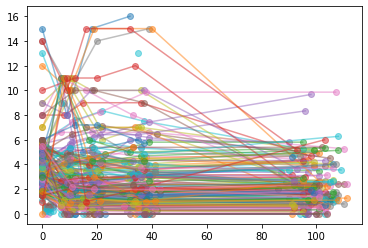

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(times, acqs, 'o-', alpha=0.5)
plt.show()

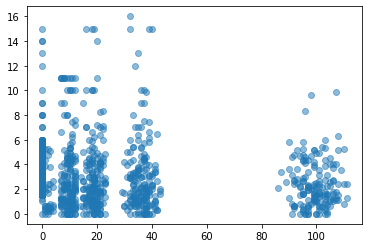

In [29]:

plt.scatter(times, acqs, alpha=0.5)
plt.show()

In [31]:
print(len(acq[acq["acq2"] > 6]), len(acq))

26 197


In [32]:
acq_ids = acq['id']
def count_ids(data, id_set):
    count = 0
    for item in data:
        if item in id_set:
            count += 1
#             print(item)
    return count

In [33]:
print(count_ids(demo1["id"], acq["id"]))
print(count_ids(demo2["id"], acq_ids))

34
8


In [34]:
len(set(screen["id"]))

401

In [35]:
len(set(acq["id"]))

197

In [36]:
len(set(acq["id"]) - set(screen["id"]))

0

In [37]:
len(set(acq["id"]) & set(screen["id"]))

197

In [38]:
print("Number of patricipants in ACQ that are present in the Hist1:", count_ids(hist1["id"].values, acq["id"].values))
print("Number of patricipants in ACQ that are present in the Hist2:", count_ids(hist2["id"].values, acq["id"].values))
print("Number of patricipants in ACQ that are present in the SCREEN:", count_ids(screen["id"].values, acq["id"].values))
print("Number of patricipants in ACQ that are present in the Demo1:", count_ids(demo1["id"].values, acq["id"].values))
print("Number of patricipants in ACQ that are present in the Demo2:", count_ids(demo2["id"].values, acq["id"].values))


Number of patricipants in ACQ that are present in the Hist1: 26
Number of patricipants in ACQ that are present in the Hist2: 171
Number of patricipants in ACQ that are present in the SCREEN: 197
Number of patricipants in ACQ that are present in the Demo1: 26
Number of patricipants in ACQ that are present in the Demo2: 171


Features in MedicalHistory1 are very different from features in MedicalHistory2. Demographics information for the second group is also much more complete than that for the first group (e.g., in Demographics1 "race" is often recorded as "Canadian").Since most of the IDs in ACQ dataframe are coming from the second group (171 participants vs 14 participants in the frist group), we will just use the second group to extract feautre about medical history and demographics. We'll drop the "retire" column from demographic analysis because a lot of the data there is missing.

In [39]:
print(count_ids(screen["id"], acq[acq["acq2"] > 6]))

0


In [40]:
demo_all = demo.copy()
hist_all = hist.copy()

In [41]:
demo = demo2.copy()
hist=hist2.copy()

In [42]:
demo.drop(["retire"], inplace=True, axis=1)

In [43]:
info = demo.merge(hist, on='id', how="outer")

In [44]:
info.columns

Index(['id', 'assess_x', 'birthyear', 'race', 'sex', 'work', 'disab',
       'assess_y', 'smoking', 'polyps', 'vaccine', 'arthritis', 'CVD',
       'Prev-biologic', 'allergy', 'weight', 'height'],
      dtype='object')

In [45]:
info["age"] = info["assess_x"].dt.year - info['birthyear']

In [46]:
X_all = info[['id', "race", "sex", "work",
              "disab", "smoking", "polyps", "vaccine", "arthritis","CVD",
             'Prev-biologic', 'allergy', 'weight', 'height', 'age']].copy()

In [47]:
lookup = set(acq["id"])
X_all["in_study"] = X_all["id"].isin(lookup) 

In [48]:
X_all

,id,race,sex,work,disab,smoking,polyps,vaccine,arthritis,CVD,Prev-biologic,allergy,weight,height,age,in_study
0,1113,filipino,0,0,0,0.195593,0.1,0.32,0.10,0.54,0.4,0.6,257.0,70.0,41,True
1,2902,chinese,0,0,0,0.333048,0.2,0.12,0.31,0.42,0.1,0.1,277.0,59.0,53,False
2,1908,south east asian,0,1,0,0.493515,0.2,0.40,0.01,0.50,0.1,0.6,146.0,70.0,63,True
3,3002,south asian,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,False
4,3006,south asian,0,1,1,0.471206,0.1,0.20,0.37,0.74,0.2,0.8,242.0,72.0,35,False
5,1209,white (caucasian),1,1,1,0.374920,0.5,0.03,0.34,0.13,0.1,0.0,130.0,68.0,22,False
6,1705,south east asian,0,0,0,0.027924,0.3,0.28,0.11,0.31,0.7,0.5,251.0,76.0,83,False
7,3004,south asian,0,0,1,0.359783,0.4,0.46,0.29,0.53,0.5,0.8,127.0,60.0,63,True
8,1707,black,1,1,1,0.093265,0.2,0.01,0.44,0.56,0.8,0.4,133.0,65.0,85,False
9,2108,aboriginal,0,1,1,0.206549,0.2,0.02,0.04,0.54,0.4,0.7,140.0,72.0,32,False


In [ ]:
# lookup = set(acq["id"])

# X_in = X_all[X_all["id"].isin(lookup)]
# X_out = X_all[~X_all["id"].isin(lookup)]

In [ ]:
# plt.bar([1,2], [ X_in["weight"].mean(),X_out["weight"].mean()])  #, )

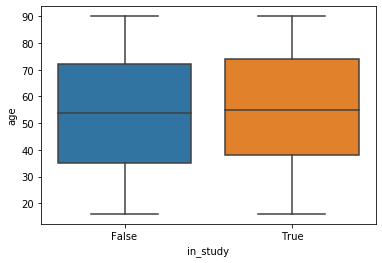

In [93]:
sns.boxplot(x="in_study", y="age", data=X_all)

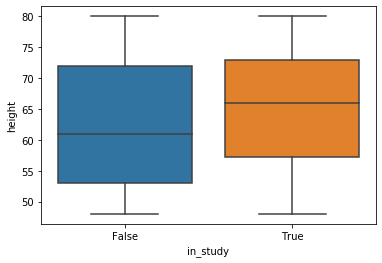

In [50]:
sns.boxplot(x="in_study", y="height", data=X_all)

Removing all data from participants where at least one of ACQ scores was above 6, since 6 is the maximum possible ACQ score.

In [52]:
data_inrange = data[~(data[["acq", "acq2", "acq3", "acq4", "acq5"]] > 6).any(axis=1)].copy()
data_inrange.head()

,id,acq,acq2,acq3,acq4,acq5,time1,time2,time3,time4,time5
0,122,3.666667,2.200000,2.420000,2.420,2.1780,0,1.0,2.0,3.0,4.0
1,129,1.833333,0.366667,0.403333,0.484,0.4356,0,1.0,2.0,NaN,NaN
2,120,3.500000,3.850000,4.235000,5.082,3.5574,0,1.0,32.0,3.0,NaN
3,127,6.000000,1.800000,1.980000,1.584,1.2672,0,21.0,2.0,NaN,NaN
4,123,1.500000,0.600000,0.600000,0.480,0.5280,0,1.0,2.0,3.0,4.0


In [53]:
times_inrange = data_inrange[["time1", "time2", "time3", "time4", "time5"]].T
acqs_inrange = data_inrange[["acq", "acq2", "acq3", "acq4", "acq5"]].T
acqs_inrange

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,190,191,192,194,195,196
acq,3.666667,1.833333,3.5000,6.0000,1.500,1.666667,5.0,1.5000,3.333333,2.333333,...,6.0,2.833333,3.500,3.666667,3.166667,1.833333,3.000,4.166667,6.000,5.500
acq2,2.200000,0.366667,3.8500,1.8000,0.600,0.666667,0.0,0.4500,4.333333,0.233333,...,0.0,0.566667,4.200,0.733333,1.900000,0.916667,NaN,2.500000,2.400,2.200
acq3,2.420000,0.403333,4.2350,1.9800,0.600,0.666667,0.0,0.4050,4.766667,0.233333,...,0.0,0.510000,4.200,0.660000,1.900000,1.008333,4.290,2.500000,2.160,1.980
acq4,2.420000,0.484000,5.0820,1.5840,0.480,0.800000,0.0,0.4860,3.813333,0.186667,...,0.0,0.612000,3.360,0.792000,1.520000,1.008333,4.290,3.000000,2.376,1.980
acq5,2.178000,0.435600,3.5574,1.2672,0.528,0.720000,0.0,0.3888,2.669333,0.205333,...,0.0,0.550800,4.032,0.633600,1.976000,1.109167,5.148,2.700000,2.376,1.386


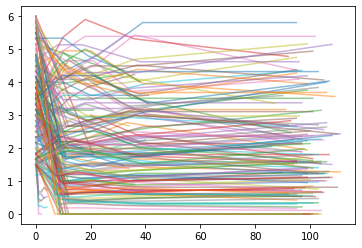

In [54]:
plt.plot(times_inrange, acqs_inrange, alpha=0.5)
plt.show()

In [110]:
data_final2 = X_all.merge(data_inrange, how="left", on="id")
assert len(data_final2) == len(X_all)

In [71]:
data_inrange

,id,acq,acq2,acq3,acq4,acq5,time1,time2,time3,time4,time5
0,122,3.666667,2.200000,2.420000,2.420000,2.178000,0,1.0,2.0,3.0,4.0
1,129,1.833333,0.366667,0.403333,0.484000,0.435600,0,1.0,2.0,NaN,NaN
2,120,3.500000,3.850000,4.235000,5.082000,3.557400,0,1.0,32.0,3.0,NaN
3,127,6.000000,1.800000,1.980000,1.584000,1.267200,0,21.0,2.0,NaN,NaN
4,123,1.500000,0.600000,0.600000,0.480000,0.528000,0,1.0,2.0,3.0,4.0
5,119,1.666667,0.666667,0.666667,0.800000,0.720000,0,1.0,2.0,3.0,4.0
6,111,5.000000,0.000000,0.000000,0.000000,0.000000,0,1.0,2.0,NaN,NaN
7,101,1.500000,0.450000,0.405000,0.486000,0.388800,0,1.0,2.0,3.0,NaN
8,118,3.333333,4.333333,4.766667,3.813333,2.669333,0,1.0,2.0,3.0,4.0
9,117,2.333333,0.233333,0.233333,0.186667,0.205333,0,1.0,2.0,3.0,4.0


## Export processed data

In [111]:
table = pa.Table.from_pandas(data_final2, preserve_index=False)
pq.write_table(table, NOTEBOOK_PATH.joinpath("data_final2.parquet"))

In [107]:
df = pq.read_table(NOTEBOOK_PATH.joinpath("data_final.parquet")).to_pandas()

In [108]:
len(df)

344

In [109]:
len(df['acq'].dropna())

143

In [73]:
data_final.head()

,id,race,sex,work,disab,smoking,polyps,vaccine,arthritis,CVD,...,acq,acq2,acq3,acq4,acq5,time1,time2,time3,time4,time5
0,1113,filipino,0,0,0,0.195593,0.1,0.32,0.10,0.54,...,2.500000,2.500000,2.50,2.00,1.800,0.0,12.0,23.0,38.0,103.0
1,2902,chinese,0,0,0,0.333048,0.2,0.12,0.31,0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1908,south east asian,0,1,0,0.493515,0.2,0.40,0.01,0.50,...,2.166667,0.433333,0.39,0.39,0.468,0.0,11.0,20.0,41.0,103.0
3,3002,south asian,1,0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3006,south asian,0,1,1,0.471206,0.1,0.20,0.37,0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df.head()

,id,race,sex,work,disab,smoking,polyps,vaccine,arthritis,CVD,...,acq,acq2,acq3,acq4,acq5,time1,time2,time3,time4,time5
0,1113,filipino,0,0,0,0.195593,0.1,0.32,0.10,0.54,...,2.500000,2.500000,2.50,2.00,1.800,0.0,12.0,23.0,38.0,103.0
1,2902,chinese,0,0,0,0.333048,0.2,0.12,0.31,0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1908,south east asian,0,1,0,0.493515,0.2,0.40,0.01,0.50,...,2.166667,0.433333,0.39,0.39,0.468,0.0,11.0,20.0,41.0,103.0
3,3002,south asian,1,0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3006,south asian,0,1,1,0.471206,0.1,0.20,0.37,0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
acq_means = acqs_inrange.T.mean(axis=0)
acq_se = acqs_inrange.T.std(axis=0)/np.sqrt(5)
acq_means

acq     3.443452
acq2    2.025051
acq3    2.058464
acq4    1.992368
acq5    1.923522
dtype: float64

In [83]:
time_means = times_inrange.T.mean(axis=0)
time_means

time1     0.000000
time2     9.226190
time3    17.785714
time4    34.773006
time5    96.565217
dtype: float64

<Figure size 432x288 with 0 Axes>

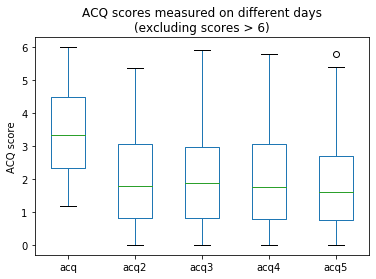

In [105]:
plt.figure()
acqs_inrange.T.plot(kind="box")
plt.title('ACQ scores measured on different days\n(excluding scores > 6)')
plt.ylabel('ACQ score')
plt.savefig(NOTEBOOK_PATH / "ACQBoxplots.svg", bbox_inches="tight")

In [87]:
from scipy import stats

In [102]:
f_val, p_val = stats.f_oneway(data_inrange["acq"].dropna(),
                             data_inrange["acq5"].dropna())  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 93.85891134091317 , P = 1.262213642392905e-19


In [106]:
f_val, p_val = stats.f_oneway(data_inrange["acq2"].dropna(),
                             data_inrange["acq5"].dropna())  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.3839856872740746 , P = 0.5359272281595432
